**Employee Attrition Analysis**

 


Kaggle — IBM HR Analytics Employee Attrition & Performance (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)


**Introdução**

A análise de dados é essencial para compreender e solucionar desafios organizacionais. Este documento explora o fenômeno da rotatividade de colaboradores (attrition) em uma empresa, com o objetivo de identificar padrões, fatores determinantes e possíveis estratégias para mitigar seu impacto.

A rotatividade de colaboradores refere-se à perda de funcionários em um determinado período e é um indicador crítico da saúde organizacional. Altos índices de rotatividade podem resultar em custos elevados de recrutamento, treinamento e perda de conhecimento institucional, além de impactar negativamente a moral das equipes e a produtividade geral.

Nosso objetivo é fornecer à empresa uma visão clara e fundamentada sobre os fatores que influenciam a rotatividade, contribuindo para o desenvolvimento de estratégias mais eficazes de retenção e engajamento dos colaboradores.

Para este estudo, utilizamos um conjunto de dados fictício, criado por cientistas de dados da IBM, que simula cenários relacionados à rotatividade de funcionários e ao desempenho no ambiente de trabalho.




**Importação das bibliotecas**

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

c:\Users\luano\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Carregamento e Exploração de Dados**

In [2]:
#Carregando os dados
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, qunatidade de registros, etc) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#Comando para Identificar Quantidade de valores nulo
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#Comando utilizado para fazer uma análise rápida com medidas estatísticas.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Análise Exploratória de Dados**

**Visão geral de gênero**

In [8]:
qtd_sex = df['Gender'].value_counts().reset_index()
qtd_sex.columns = ['Gender', 'Total']
# Calcular o número de colaboradores com Attrition = Yes por gênero
Qtd_attrition_sex_Yes = (df[df['Attrition'] == 'Yes'].groupby('Gender')['Attrition'].count().reset_index(name='Attrition_Total'))
taxa_attrition_sex_Yes = Qtd_attrition_sex_Yes.merge(qtd_sex, on='Gender')
# Calcular a taxa de Attrition
taxa_attrition_sex_Yes['Taxa_Attrition'] = ((taxa_attrition_sex_Yes['Attrition_Total'] / taxa_attrition_sex_Yes['Total']) * 100)
print(taxa_attrition_sex_Yes)

   Gender  Attrition_Total  Total  Taxa_Attrition
0  Female               87    588       14.795918
1    Male              150    882       17.006803


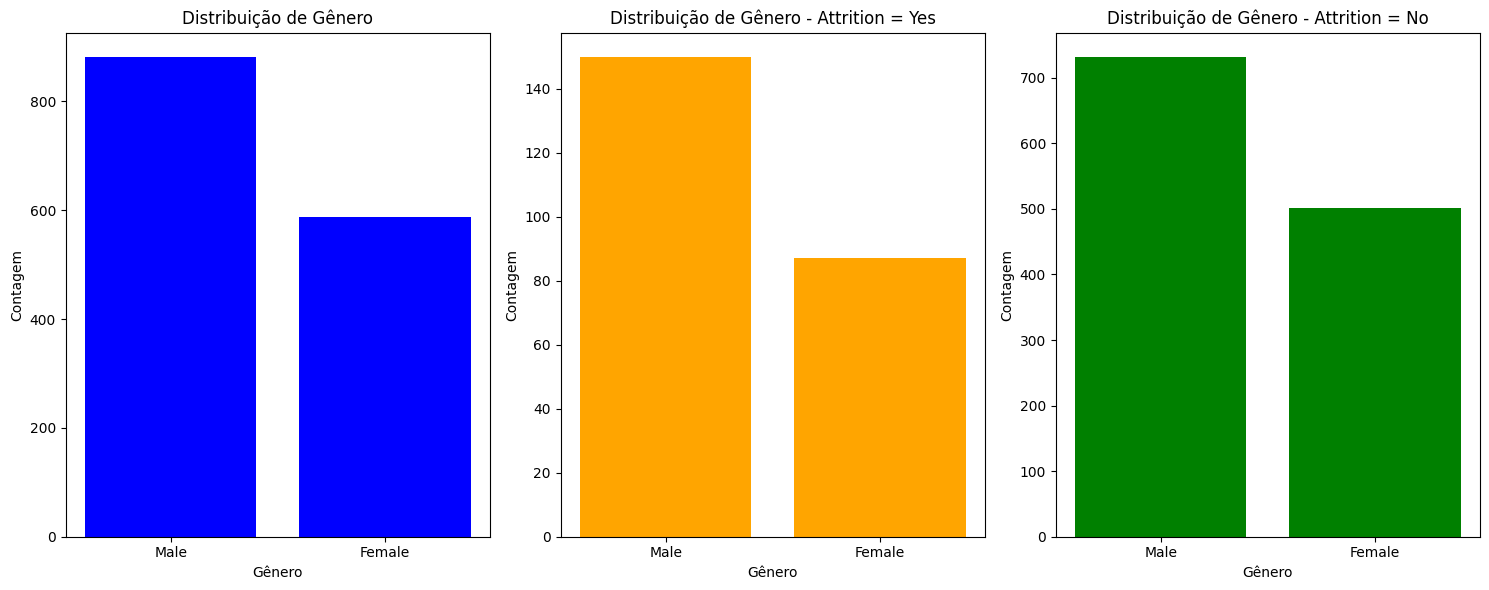

In [9]:
# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Gráfico 0: Distribuição geral de gênero
counts = df['Gender'].value_counts()  # Corrigido o agrupamento
axes[0].bar(counts.index, counts.values, color='blue')
axes[0].set_title('Distribuição de Gênero')  # Fechado o apóstrofo
axes[0].set_xlabel('Gênero')
axes[0].set_ylabel('Contagem')

# Gráfico 1: Distribuição de gênero para Attrition = Yes
yes_counts = df[df['Attrition'] == 'Yes']['Gender'].value_counts()
axes[1].bar(yes_counts.index, yes_counts.values, color='orange')
axes[1].set_title('Distribuição de Gênero - Attrition = Yes')
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('Contagem')

# Gráfico 2: Distribuição de gênero para Attrition = No
no_counts = df[df['Attrition'] == 'No']['Gender'].value_counts()
axes[2].bar(no_counts.index, no_counts.values, color='green')
axes[2].set_title('Distribuição de Gênero - Attrition = No')
axes[2].set_xlabel('Gênero')
axes[2].set_ylabel('Contagem')

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()

Esses resultados sugerem que homens têm uma maior probabilidade de pedir demissão, possuindo uma taxa de aproximadamente 17%.

**Idade**

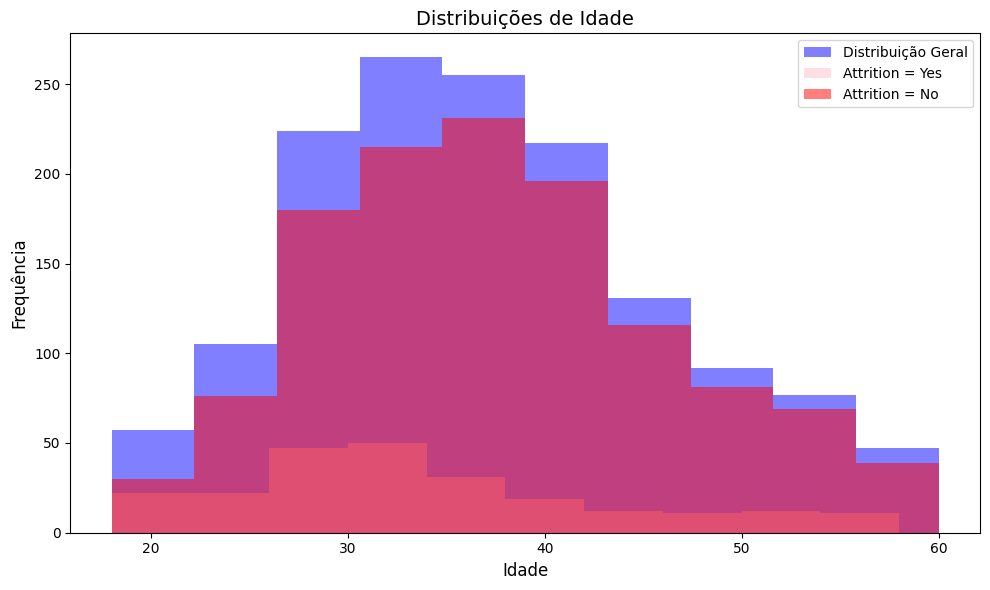

In [10]:
# Dados para os diferentes grupos
age = df['Age']
yes_age = df[df['Attrition'] == 'Yes']['Age']
no_age = df[df['Attrition'] == 'No']['Age']

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Adicionar as distribuições ao mesmo gráfico
plt.hist(age, bins=10, color='blue', alpha=0.5, label='Distribuição Geral')
plt.hist(yes_age, bins=10, color='pink', alpha=0.5, label='Attrition = Yes')
plt.hist(no_age, bins=10, color='red', alpha=0.5, label='Attrition = No')

# Configurar título e rótulos
plt.title('Distribuições de Idade', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

A análise da faixa etária revela padrões interessantes relacionados à taxa de attrition. Observa-se que profissionais mais jovens, com idades entre 18 e 25 anos, apresentam os maiores índices de rotatividade. Esse comportamento pode estar associado à tendência dos jovens em buscar novos desafios e oportunidades em outras empresas, refletindo uma fase inicial de suas carreiras marcada pela exploração e pelo desejo de crescimento profissional.

**Attrition por Departamento**

In [11]:
#Quantidade de colaboradores por departamento
Qtd_Colaborador_Departamento=df.groupby('Department')['Attrition'].count().reset_index(name='Total').sort_values(by='Total',ascending=True)

In [12]:
#Quantidade de Attrition, o valor total e a taxa de attrition por departamento 
Qtd_attrition_Departamento_Yes=df[df['Attrition'] == 'Yes'].groupby(['Attrition', 'Department'])['Attrition'].count().reset_index(name='Attrition_Total').drop(columns=['Attrition'])
taxa_attrition_Departamento_Yes=Qtd_attrition_Departamento_Yes.merge(Qtd_Colaborador_Departamento, on='Department')
taxa_attrition_Departamento_Yes['Taxa_Attrition']=(taxa_attrition_Departamento_Yes['Attrition_Total']/taxa_attrition_Departamento_Yes['Total'])*100
taxa_attrition_Departamento_Yes

,Department,Attrition_Total,Total,Taxa_Attrition
0,Human Resources,12,63,19.047619
1,Research & Development,133,961,13.839750
2,Sales,92,446,20.627803


Ao observamos a taxa de Attrition, podemos constatar que o Departamento de Vendas possui uma taxa mais elevada, chegando a 20,63%, seguido do departamento de Recursos Humanos com 19,04% e com a menor taxa o setor de Pesquisa e desenvolvimento com 13,83%. Os resultados fornecem os insights importantes para a organização sobre as áreas mais sucetives a rotatividade de colaboradores. A alta taxa de Attrition do setor de Vendas pode ser atribuida as inúmeros fatores , entre eles podemos citar: Pressão de metas e desempenho, Incerteza do mercado, alta concorrencia, valores salárias e entre outros.

**Média de Satisfação**

In [13]:
satisfacao_geral = df.groupby('Department')[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction']].mean().reset_index()
satisfacao_geral

,Department,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction
0,Human Resources,2.603175,2.888889,2.682540
1,Research & Development,2.726327,2.708637,2.744017
2,Sales,2.751121,2.695067,2.679372


In [14]:
satisfacao_yes=df[df['Attrition']== 'Yes'].groupby('Department')[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction']].mean().reset_index()
satisfacao_yes


,Department,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction
0,Human Resources,2.166667,3.083333,2.333333
1,Research & Development,2.458647,2.518797,2.473684
2,Sales,2.521739,2.652174,2.467391


In [15]:
satisfacao_no=df[df['Attrition']== 'No'].groupby('Department')[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction']].mean().reset_index()
satisfacao_no

,Department,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction
0,Human Resources,2.705882,2.843137,2.764706
1,Research & Development,2.769324,2.739130,2.787440
2,Sales,2.810734,2.706215,2.734463


In [16]:
satisfação_por_cargo= df.groupby('JobRole')[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction']].mean().reset_index()
satisfação_por_cargo

,JobRole,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction
0,Healthcare Representative,2.786260,2.694656,2.770992
1,Human Resources,2.557692,2.961538,2.596154
2,Laboratory Technician,2.691120,2.687259,2.718147
3,Manager,2.705882,2.813725,2.764706
4,Manufacturing Director,2.682759,2.724138,2.917241
5,Research Director,2.700000,2.687500,2.500000
6,Research Scientist,2.773973,2.705479,2.726027
7,Sales Executive,2.754601,2.702454,2.671779
8,Sales Representative,2.734940,2.602410,2.734940


In [17]:
satisfação_por_cargo_yes= df[df['Attrition']== 'Yes'].groupby('JobRole')[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction']].mean().reset_index()
satisfação_por_cargo_yes

,JobRole,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction
0,Healthcare Representative,2.777778,2.444444,2.111111
1,Human Resources,2.166667,3.083333,2.333333
2,Laboratory Technician,2.435484,2.661290,2.387097
3,Manager,2.400000,3.400000,1.800000
4,Manufacturing Director,2.600000,2.200000,2.600000
5,Research Director,2.500000,4.000000,3.000000
6,Research Scientist,2.425532,2.255319,2.617021
7,Sales Executive,2.526316,2.596491,2.385965
8,Sales Representative,2.484848,2.757576,2.696970


Ao comparar as médias de satisfação entre funcionários com e sem attrition, observa-se uma tendência clara: colaboradores sem attrition tendem a apresentar níveis mais elevados de satisfação no trabalho, ambiente e relacionamentos em comparação com aqueles que passaram por attrition. Esses resultados sugerem que as médias mais altas entre os funcionários que permanecem refletem um ambiente organizacional mais favorável, onde a decisão de continuar na empresa está vinculada a maiores níveis de contentamento em diferentes aspectos do trabalho.

**Média Salarial**

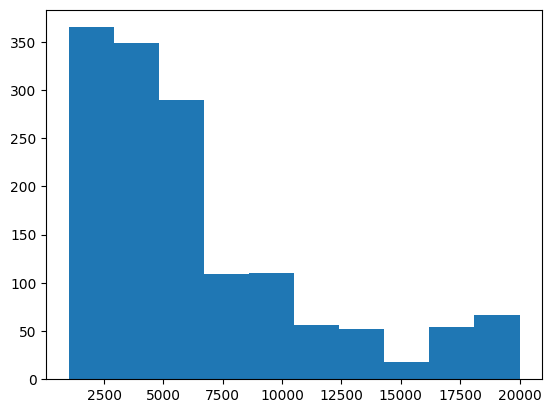

In [18]:
#inicialmente plotamos um histograma para visualizar a distruibuição do salário dos colaboradores dentro da empresa.
plt.hist(df['MonthlyIncome'])
plt.show()

In [19]:
#Média salárial e salário máximo e mínimo dos colaboradores com Attrition
media_salarial_yes=df[df['Attrition']== 'Yes'].groupby(['Department'])['MonthlyIncome'].mean().reset_index()
salario_yes_max=df[df['Attrition']== 'Yes'].groupby(['Department'])['MonthlyIncome'].max().reset_index().rename(columns={'MonthlyIncome': 'Salario_Max'})
salario_yes_min=df[df['Attrition']== 'Yes'].groupby(['Department'])['MonthlyIncome'].min().reset_index().rename(columns={'MonthlyIncome': 'Salario_Min'})
Media_Salario_sim=media_salarial_yes.merge(salario_yes_max, on='Department').merge(salario_yes_min, on='Department')
Media_Salario_sim

,Department,MonthlyIncome,Salario_Max,Salario_Min
0,Human Resources,3715.750000,10482,1555
1,Research & Development,4108.075188,19859,1009
2,Sales,5908.456522,19845,1081


In [20]:
#Média salárial e salário máximo e mínimo dos colaboradores sem Attrition
media_salarial_no=df[df['Attrition']== 'No'].groupby(['Department'])['MonthlyIncome'].mean().reset_index()
salario_max_no=df[df['Attrition']== 'No'].groupby(['Department'])['MonthlyIncome'].max().reset_index().rename(columns={'MonthlyIncome': 'Salario_Max'})
salario_min_no=df[df['Attrition']== 'No'].groupby(['Department'])['MonthlyIncome'].min().reset_index().rename(columns={'MonthlyIncome': 'Salario_Min'})
Media_Salario_no=media_salarial_no.merge(salario_max_no, on='Department').merge(salario_min_no, on='Department')
Media_Salario_no

,Department,MonthlyIncome,Salario_Max,Salario_Min
0,Human Resources,7345.980392,19717,2064
1,Research & Development,6630.326087,19999,1051
2,Sales,7232.240113,19847,1052


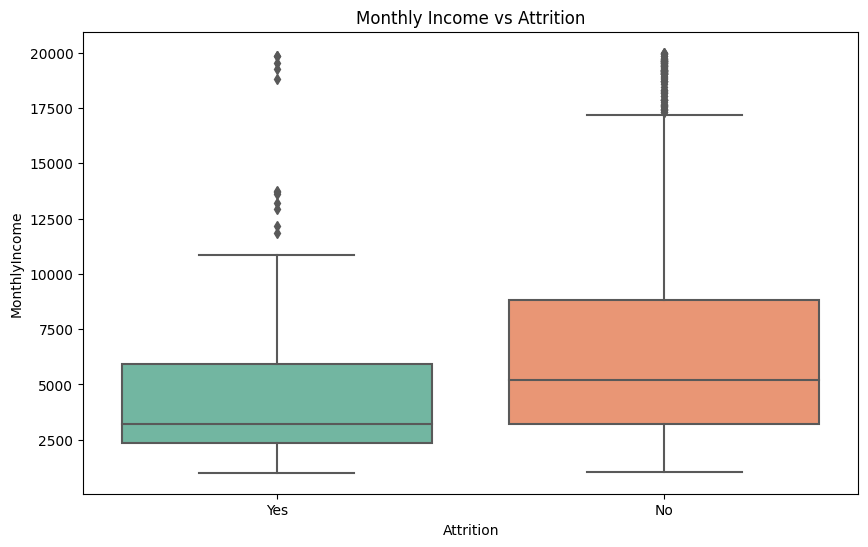

In [21]:
# Analyzing Monthly Income and Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set2')
plt.title('Monthly Income vs Attrition')
plt.show()


Os resultados indicam uma relação entre a média salarial e a taxa de attrition, evidenciando que departamentos com salários mais competitivos geralmente registram taxas de attrition menores. Esses dados corroboram a hipótese de que a remuneração exerce um impacto relevante na retenção de talentos, reforçando a necessidade de estratégias salariais bem estruturadas para promover o engajamento e a fidelização dos colaboradores à organização. Em relação ao salário máx, podemos verificar uma diferença expressiva entre o salário max dos colaboradores com e sem attrition do departamento Human Resources. 

**Education Field Analysis**

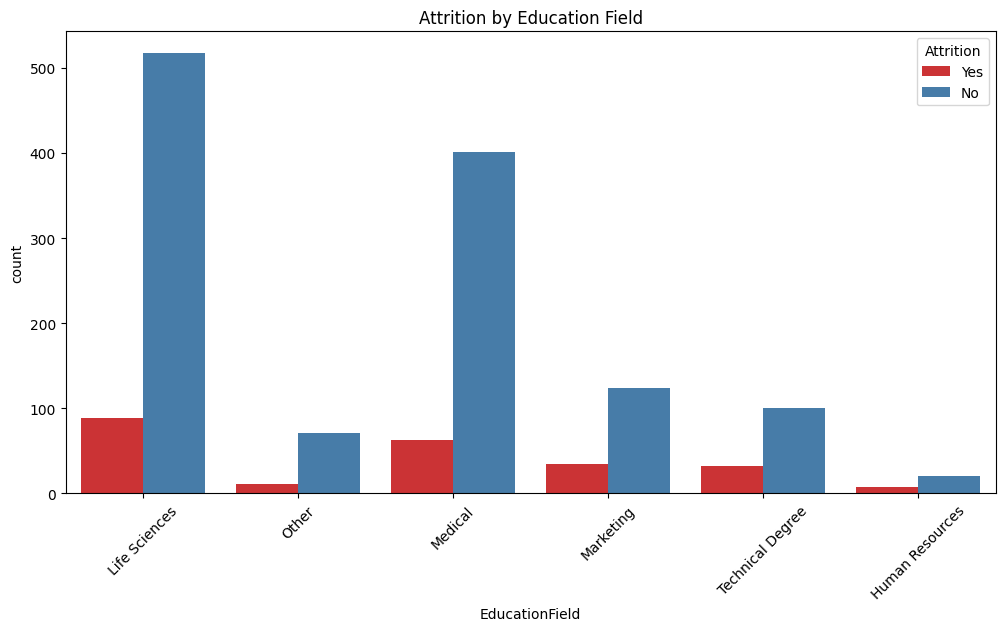

In [22]:
# Education Field Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='EducationField', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition by Education Field')
plt.xticks(rotation=45)
plt.show()

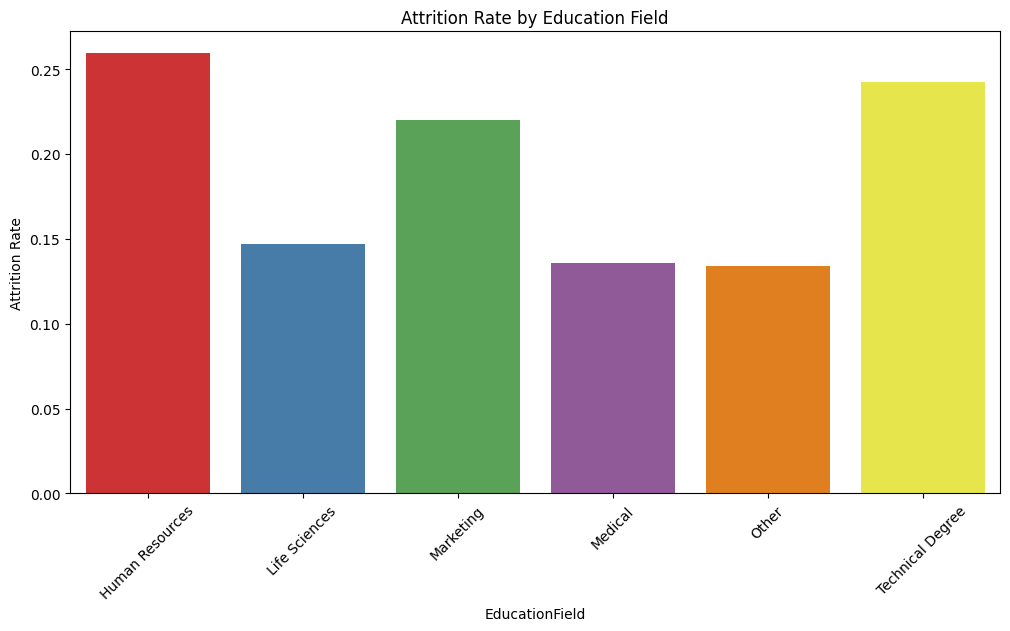

In [23]:
# Calcular a taxa de attrition 
attrition_rate = df.groupby('EducationField').apply(lambda x: (x['Attrition'] == 'Yes').mean())

# Plotar a taxa de attrition por EducationField
plt.figure(figsize=(12, 6))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='Set1')
plt.title('Attrition Rate by Education Field')
plt.xticks(rotation=45)
plt.ylabel('Attrition Rate')
plt.show()


Após analisar os gráficos, podemos concluir que os funcionários com formação nas áreas de Recursos Humanos, Marketing e Grau Técnico apresentam as taxas mais altas de desistência. Por outro lado, a desistência é mais baixa entre os funcionários com formação em Ciências da Vida.

**Distancia entre o trabalho e a casa do colaborador**

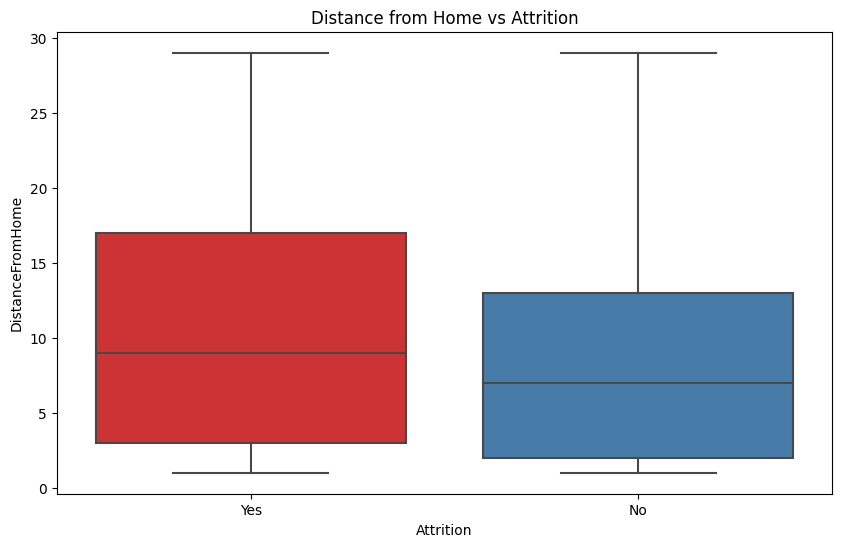

In [24]:
# Insights from Distance from Home
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, palette='Set1')
plt.title('Distance from Home vs Attrition')
plt.show()

O gráfico mostra que funcionários que se desligaram tendem a morar mais longe do trabalho, com uma mediana de distância maior (próxima a 10) em comparação aos que permaneceram, cuja mediana está em torno de 5. Além disso, a dispersão das distâncias é maior no grupo desligado. Esses dados sugerem que a distância maior pode estar relacionada ao desligamento.

**Conclusões**

A análise identificou que o departamento de Vendas apresenta a maior taxa de rotatividade (attrition). Além disso, verificou-se que funcionários do sexo masculino têm uma rotatividade superior à das colaboradoras.

Outro fator relevante é a distância residencial: colaboradores que residem mais longe do trabalho tendem a apresentar maior propensão a deixar a empresa. As funções com os maiores índices de rotatividade incluem Executivo de Vendas, Representante de Vendas, Técnico de Laboratório e Cientista de Pesquisa.

A satisfação no trabalho também desempenha um papel crítico: funcionários com baixos níveis de satisfação, tanto no trabalho quanto no ambiente organizacional, lideram as taxas de saída.

Por fim, ao analisar o impacto da área educacional, observou-se que profissionais com formação em Recursos Humanos e Diploma Técnico têm maior probabilidade de pedir demissão em comparação com trabalhadores de outras áreas.